In [124]:
# import librereies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mso

In [125]:
#import data set
df=pd.read_csv('StudentsPerformance.csv')


In [126]:
# first 5 data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [127]:
#find shape of the data set
df.shape

(1000, 8)

In [128]:
# feratures in the data set
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [129]:
# infermation of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [130]:
#data type of the features
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [131]:
# find miising values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [132]:
#find duplicate values
df.duplicated().sum()

0

In [133]:
#count uique values in the data set
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [134]:
#discription of the data set
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [135]:
# find numeric featuers
numeric_features = []
categorical_features = []

# Iterate over the columns to classify features
for feature in df.columns:
    if df[feature].dtype != 'object':
        numeric_features.append(feature)
    else:
        categorical_features.append(feature)

# Print the results in a single line
print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')

Numeric features: ['math score', 'reading score', 'writing score']
Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [136]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [137]:
#find the sub features in the dataset
print("The catogerical values in the featuer Gender:",df['gender'].unique())
print("The catogerical values in the featuer Race:",df['race/ethnicity'].unique())
print("The catogerical values in the featuer Parental level of education:",df['parental level of education'].unique())
print("The catogerical values in the featuer Lunch:",df['lunch'].unique())
print("The catogerical values in the featuer Test preparation course:",df['test preparation course'].unique())

The catogerical values in the featuer Gender: ['female' 'male']
The catogerical values in the featuer Race: ['group B' 'group C' 'group A' 'group D' 'group E']
The catogerical values in the featuer Parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The catogerical values in the featuer Lunch: ['standard' 'free/reduced']
The catogerical values in the featuer Test preparation course: ['none' 'completed']


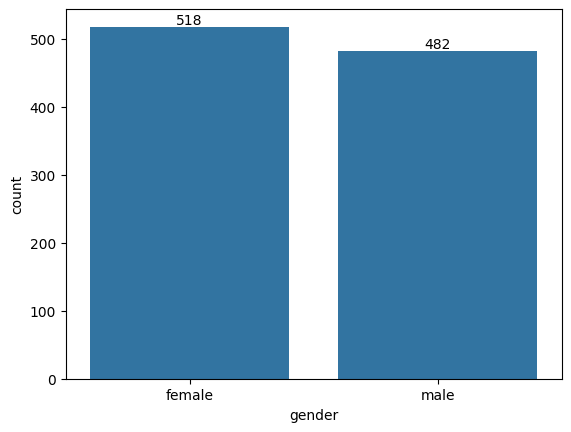

In [138]:
#most gender in the dataset
gender=sns.countplot(x='gender',data=df)
for bars in gender.containers:
    gender.bar_label(bars)

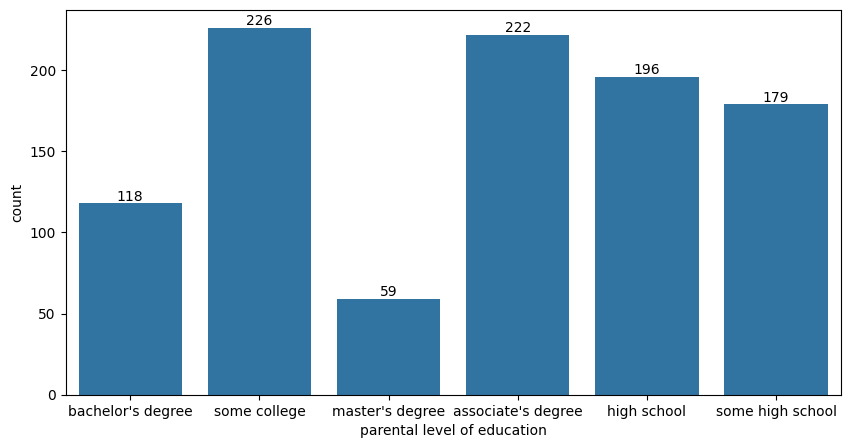

In [139]:
#most partial level education in the data set
plt.figure(figsize=(10,5))
education=sns.countplot(x='parental level of education',data=df)
for bars in education.containers:
    education.bar_label(bars)

In [140]:
#find the numeric and catogarical features
numeric_features=[feature for feature in df.columns if df[feature].dtypes !='object']
print('the {} numeical featuers are:{}'.format(len(numeric_features),numeric_features))
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'object']
print('the {} catagorical featuers are:{}'.format(len(categorical_features),categorical_features))

the 3 numeical featuers are:['math score', 'reading score', 'writing score']
the 5 catagorical featuers are:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [141]:
#find total score anbd average
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [142]:
#find full mark students count in diffrent subjects
mathtop=df[df['math score']==100]['average'].count()
readingtop=df[df['reading score']==100]['average'].count()
writingtop=df[df['writing score']==100]['average'].count()
print(f"The math top scorers are:{mathtop}")
print(f"The reading top scorers are:{readingtop}")
print(f"The writing top scorers are:{writingtop}")

The math top scorers are:7
The reading top scorers are:17
The writing top scorers are:14


In [143]:
#failed students in diffrent subjects
mathfales=df[df['math score']<=20]['average'].count()
readingfales=df[df['reading score'] <=20]['average'].count()
writingfales=df[df['writing score'] <=20]['average'].count()
print(f"The math failesd scorers are:{mathfales}")
print(f"The reading failed scorers are:{readingfales}")
print(f"The writing faled scorers are:{writingfales}")

The math failesd scorers are:4
The reading failed scorers are:1
The writing faled scorers are:3


<Axes: xlabel='average', ylabel='Count'>

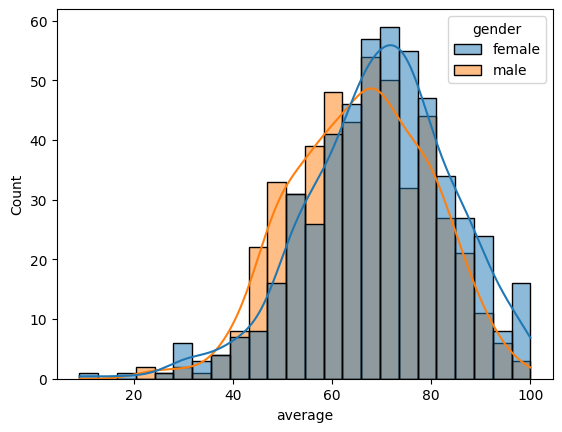

In [144]:
#plot the average scored students in gender base
sns.histplot(data=df,hue='gender',x='average',kde=True)

<Axes: xlabel='total_score', ylabel='Count'>

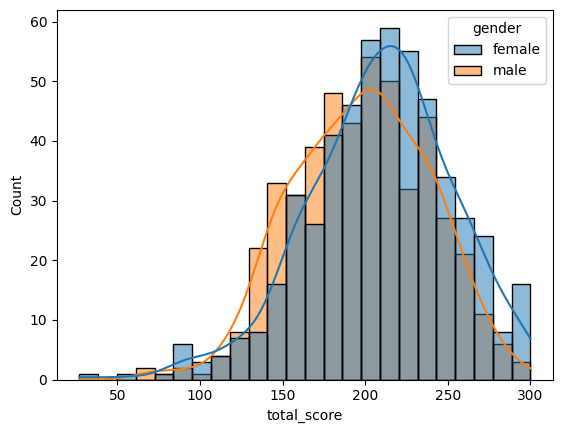

In [145]:
#total scored students in gender based
sns.histplot(data=df,hue='gender',x='total_score',kde=True)

In [146]:
#find competed test preparetion course
test=df[df['test preparation course']=='completed']['gender'].count()
print(f"the test preperation course completed sudents are:{test}")

the test preperation course completed sudents are:358


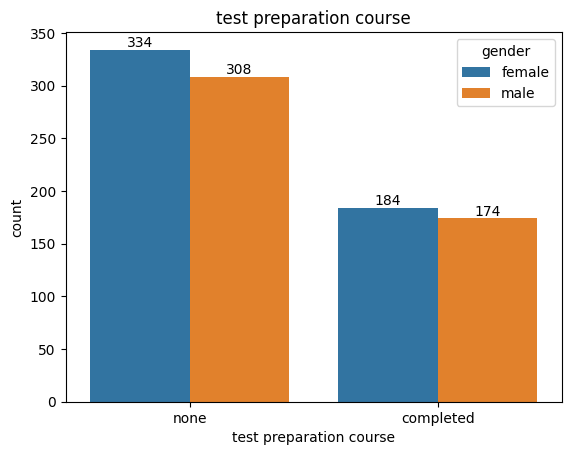

In [147]:
test=sns.countplot(x='test preparation course',hue='gender',data=df)
plt.title('test preparation course')
for i in test.containers:
    test.bar_label(i)

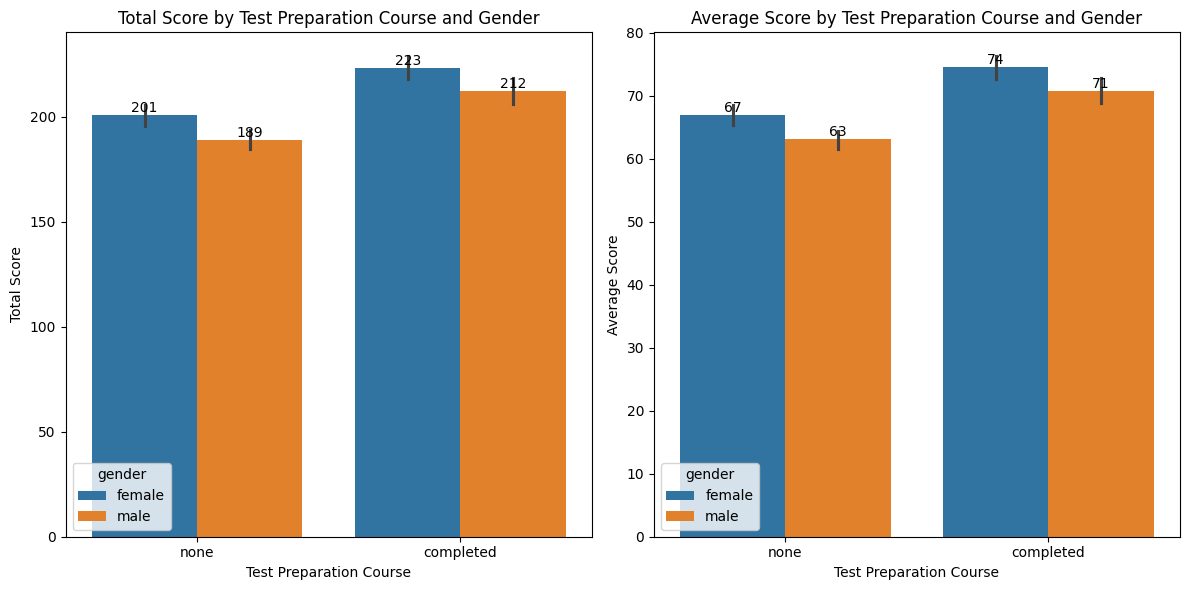

In [148]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
course = sns.barplot(x='test preparation course', y='total_score', data=df, hue='gender', ax=axs[0])
for container in course.containers:
    course.bar_label(container, fmt='%.0f')
axs[0].set_xlabel('Test Preparation Course')
axs[0].set_ylabel('Total Score')
axs[0].set_title('Total Score by Test Preparation Course and Gender')
course1 = sns.barplot(x='test preparation course', y='average', data=df, hue='gender', ax=axs[1])
for container in course1.containers:
    course1.bar_label(container, fmt='%.0f')
axs[1].set_xlabel('Test Preparation Course')
axs[1].set_ylabel('Average Score')
axs[1].set_title('Average Score by Test Preparation Course and Gender')
plt.tight_layout()

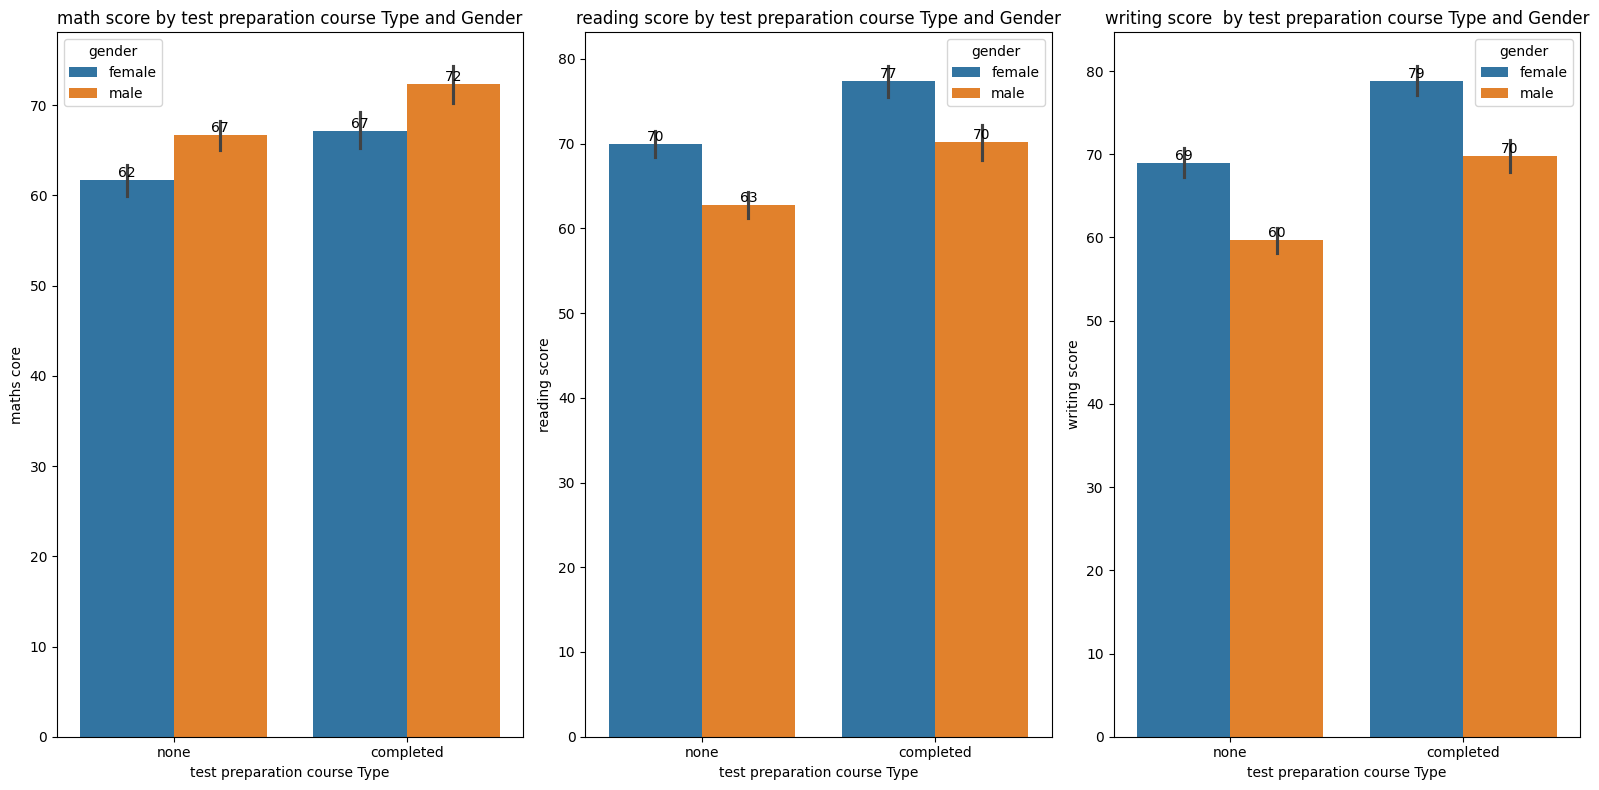

In [149]:
#ploat the test preperation course provide diffrent subject mark diffrent
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
lunch = sns.barplot(y='math score', x='test preparation course', hue='gender', data=df, ax=axs[0])
for container in lunch.containers:
    lunch.bar_label(container, fmt='%.0f')
axs[0].set_xlabel('test preparation course Type')
axs[0].set_ylabel('maths core')
axs[0].set_title('math score by test preparation course Type and Gender')
lunch1 = sns.barplot(y='reading score', x='test preparation course', hue='gender', data=df, ax=axs[1])
for container in lunch1.containers:
    lunch1.bar_label(container, fmt='%.0f') 
axs[1].set_xlabel('test preparation course Type')
axs[1].set_ylabel('reading score')
axs[1].set_title('reading score by test preparation course Type and Gender')
lunch2 = sns.barplot(y='writing score', x='test preparation course', hue='gender', data=df, ax=axs[2])
for container in lunch2.containers:
    lunch2.bar_label(container, fmt='%.0f') 
axs[2].set_xlabel('test preparation course Type')
axs[2].set_ylabel('writing score')
axs[2].set_title('writing score  by test preparation course Type and Gender')
plt.tight_layout()


Text(0.5, 1.0, 'writing Score Distribution by Gender')

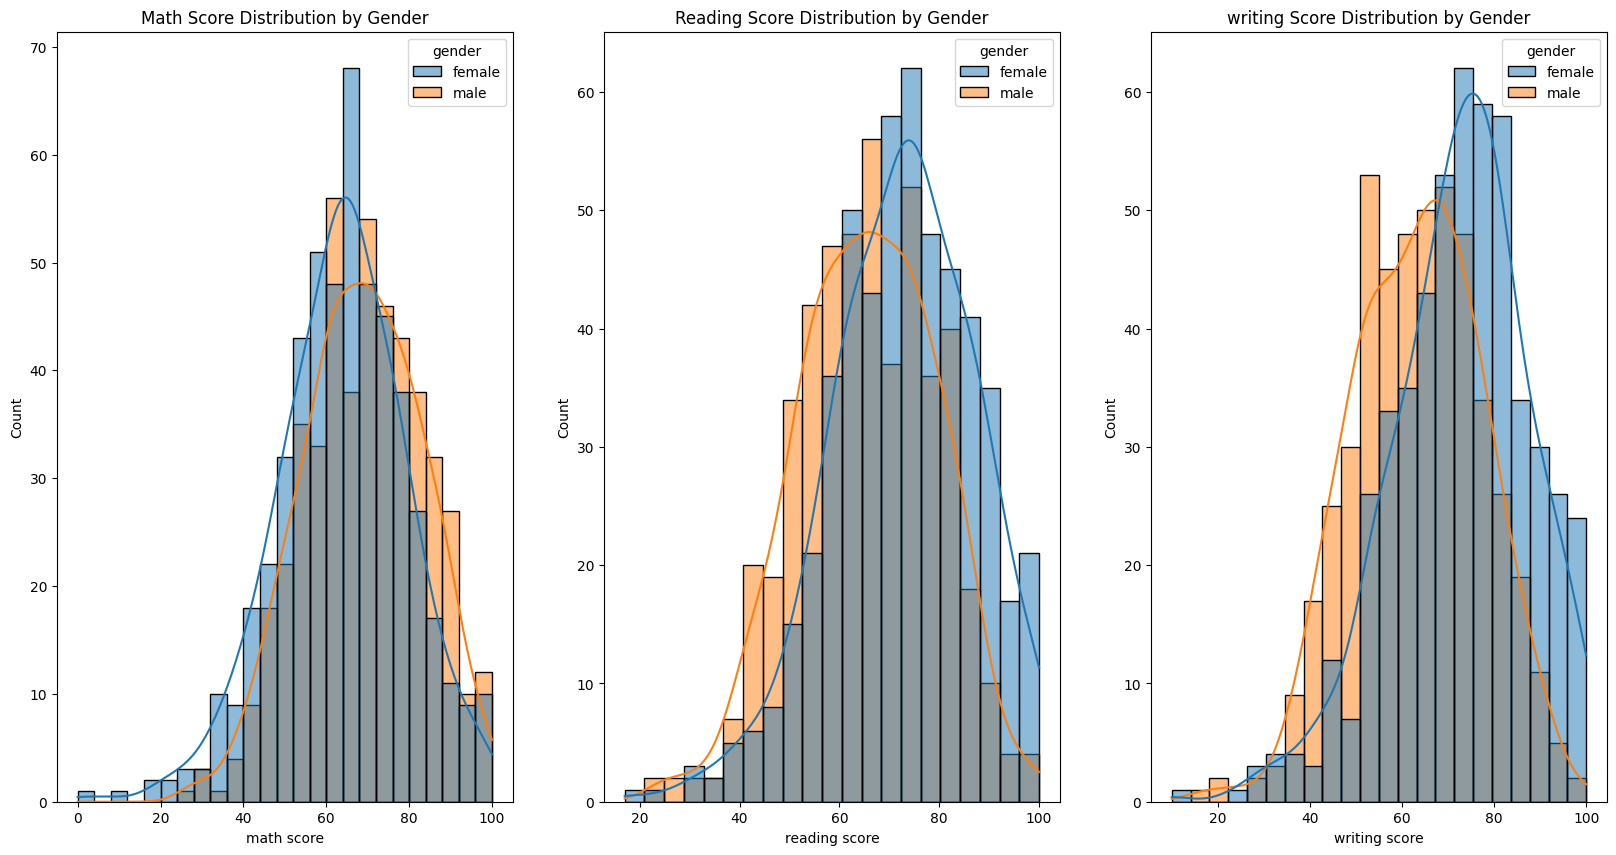

In [150]:
#ploat the scores in diffrent subjects
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
sns.histplot(x='math score', hue='gender', data=df, kde=True, ax=axs[0])
axs[0].set_title('Math Score Distribution by Gender')
sns.histplot(x='reading score', hue='gender', data=df, kde=True, ax=axs[1])
axs[1].set_title('Reading Score Distribution by Gender')
sns.histplot(x='writing score', hue='gender', data=df, kde=True, ax=axs[2])
axs[2].set_title('writing Score Distribution by Gender')

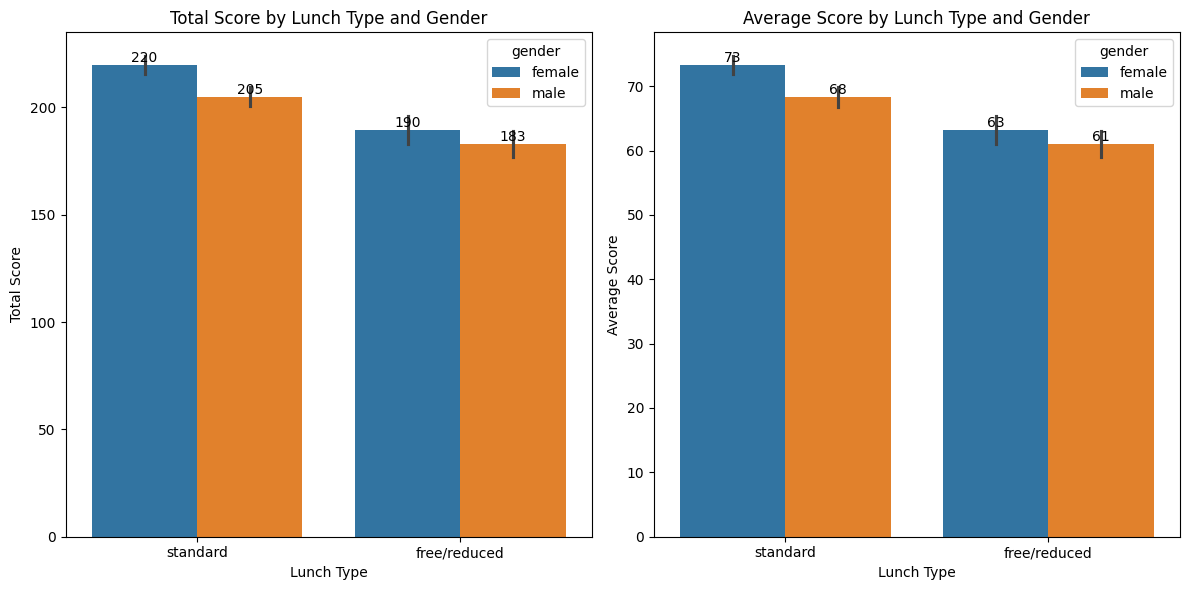

In [151]:

#ploat the lunch using the mark diffrent
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
lunch = sns.barplot(y='total_score', x='lunch', hue='gender', data=df, ax=axs[0])
for container in lunch.containers:
    lunch.bar_label(container, fmt='%.0f')
axs[0].set_xlabel('Lunch Type')
axs[0].set_ylabel('Total Score')
axs[0].set_title('Total Score by Lunch Type and Gender')
lunch1 = sns.barplot(y='average', x='lunch', hue='gender', data=df, ax=axs[1])
for container in lunch1.containers:
    lunch1.bar_label(container, fmt='%.0f') 
axs[1].set_xlabel('Lunch Type')
axs[1].set_ylabel('Average Score')
axs[1].set_title('Average Score by Lunch Type and Gender')
plt.tight_layout()

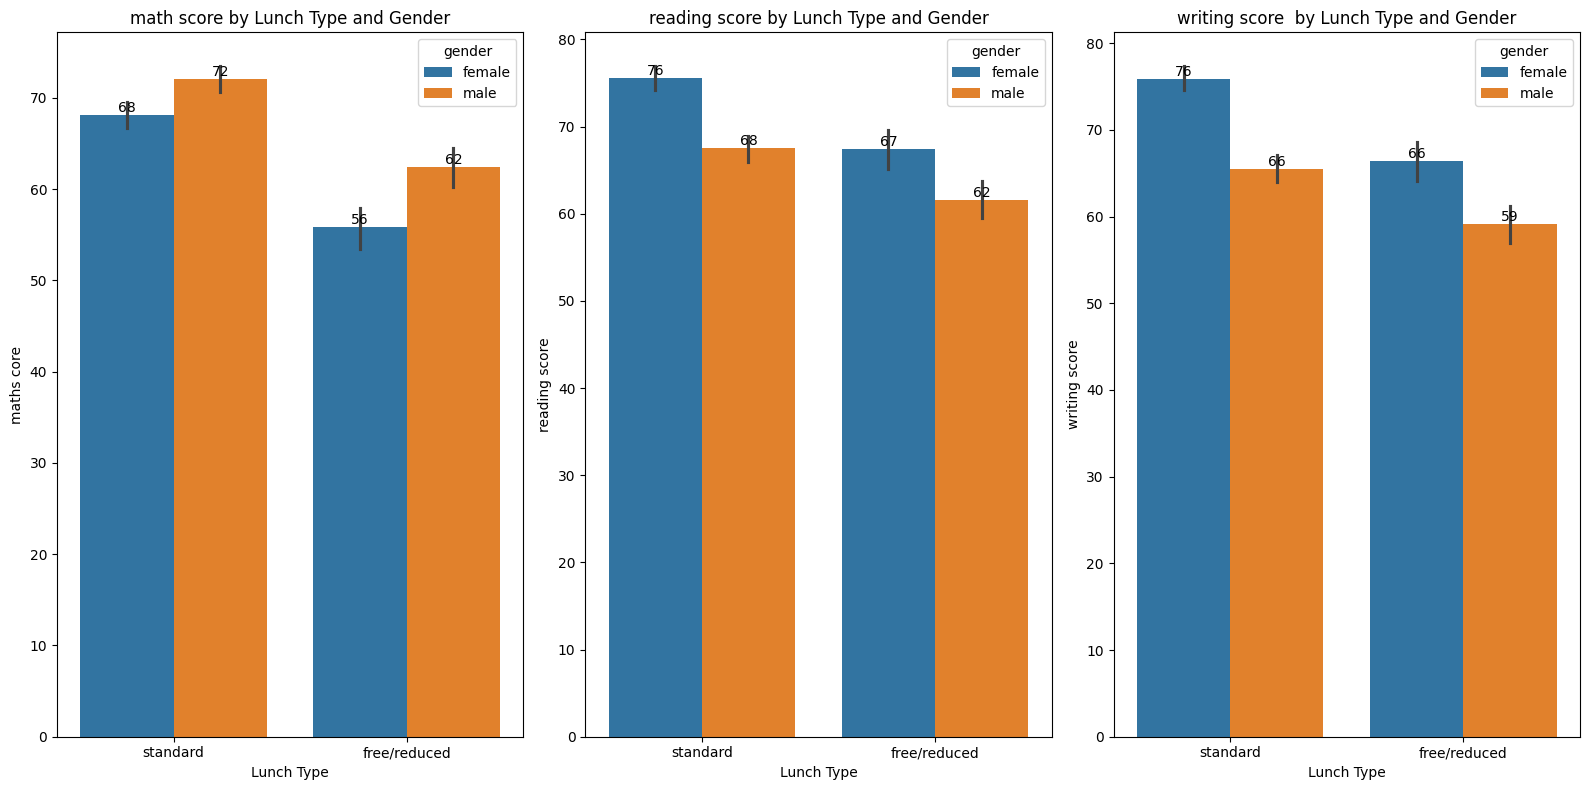

In [152]:
#ploat the lunch provide diffrent subject mark diffrent
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
lunch = sns.barplot(y='math score', x='lunch', hue='gender', data=df, ax=axs[0])
for container in lunch.containers:
    lunch.bar_label(container, fmt='%.0f')
axs[0].set_xlabel('Lunch Type')
axs[0].set_ylabel('maths core')
axs[0].set_title('math score by Lunch Type and Gender')
lunch1 = sns.barplot(y='reading score', x='lunch', hue='gender', data=df, ax=axs[1])
for container in lunch1.containers:
    lunch1.bar_label(container, fmt='%.0f') 
axs[1].set_xlabel('Lunch Type')
axs[1].set_ylabel('reading score')
axs[1].set_title('reading score by Lunch Type and Gender')
lunch2 = sns.barplot(y='writing score', x='lunch', hue='gender', data=df, ax=axs[2])
for container in lunch2.containers:
    lunch2.bar_label(container, fmt='%.0f') 
axs[2].set_xlabel('Lunch Type')
axs[2].set_ylabel('writing score')
axs[2].set_title('writing score  by Lunch Type and Gender')
plt.tight_layout()


# conclusion

* most of the item is womens 518 and mens are 482
* most of the partial level education is some college is 226 then associate degree is 222
* lovest partial educations are masters degree is 59
* most average crack students are females
* most total score crack students are females
* females are most completed test preperation course